In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import Adam
from keras.utils import np_utils


In [9]:
data=pd.read_csv('fashion-mnist_test.csv')
x=data.values
X=x[:,1:]
y=x[:,0]
X=X/255.0
X = X.reshape((-1,28,28,1))
y = np_utils.to_categorical(y)
print (X.shape, y.shape)

(10000, 28, 28, 1) (10000, 10)


In [3]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()



W0714 09:48:09.626137 139624826849088 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 09:48:09.635484 139624826849088 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 09:48:09.637090 139624826849088 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 09:48:09.663052 139624826849088 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.place

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
__________

In [15]:
adam=Adam(decay=0.001,lr=0.01)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [17]:
hist = model.fit(X,y, epochs=10, shuffle=True, batch_size=64, validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 5s 587us/step - loss: 0.6731 - acc: 0.7839 - val_loss: 0.7232 - val_acc: 0.7945
Epoch 2/10
8000/8000 [==============================] - 5s 621us/step - loss: 0.4574 - acc: 0.8305 - val_loss: 0.5000 - val_acc: 0.8515
Epoch 3/10
8000/8000 [==============================] - 5s 643us/step - loss: 0.4174 - acc: 0.8468 - val_loss: 0.5175 - val_acc: 0.8415
Epoch 4/10
8000/8000 [==============================] - 5s 655us/step - loss: 0.4000 - acc: 0.8524 - val_loss: 0.4865 - val_acc: 0.8410
Epoch 5/10
8000/8000 [==============================] - 4s 551us/step - loss: 0.3788 - acc: 0.8568 - val_loss: 0.4583 - val_acc: 0.8665
Epoch 6/10
8000/8000 [==============================] - 5s 615us/step - loss: 0.3540 - acc: 0.8665 - val_loss: 0.3994 - val_acc: 0.8725
Epoch 7/10
8000/8000 [==============================] - 5s 564us/step - loss: 0.3341 - acc: 0.8740 - val_loss: 0.3874 - val_acc: 0.8670


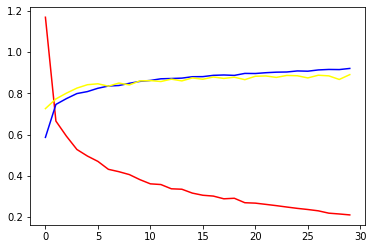

In [7]:
plt.plot(hist.history['loss'],color='red')
plt.plot(hist.history['acc'],color='blue')
plt.plot(hist.history['val_acc'],color='yellow')

plt.show()